<center><b>Nhóm 14</b></center>

| STT | Họ và tên             |   MSSV   |
|:---:|:----------------------|:--------:|
|  1  | Nguyễn Tấn Phát       | 21133107 |
|  2  | Trần Phan Quốc        | 21133108 |
|  3  | Nguyễn Thị Thanh Hiền | 21133032 |
|  4  | Tăng Huỳnh Minh Tiến  | 21133088 |

## K-means Clustering cho dataset Iris

<b>Dữ liệu</b>
<br>Tập dữ liệu hoa Iris: <a href="https://archive.ics.uci.edu/ml/datasets/iris">https://archive.ics.uci.edu/ml/datasets/iris</a>

### Import tập dữ liệu và các thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, normalized_mutual_info_score
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from yellowbrick.cluster import silhouette_visualizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_raw = load_iris()
iris = pd.read_csv('data/iris.csv', index_col='Id')
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## Xem và mô tả dữ liệu

In [4]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
len(iris)

150

In [7]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Kiểm tra dữ liệu để xem có mâu thuẫn hay không và làm sạch dữ liệu

#### Kiểm tra null()

In [10]:
iris.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


#### Kiểm tra số lượng biến bị thiếu

In [11]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Mô hình hóa 

#### Kiểm tra dữ liệu có bị thiếu hay không

In [12]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Kiểm tra số lượng giá trị của mục tiêu "Species"

In [14]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Chia thành Training và Target data

Target Data

In [15]:
target_data = iris.iloc[:,4]
target_data = target_data.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
target_data.head()

Id
1    0
2    0
3    0
4    0
5    0
Name: Species, dtype: int64

Training Data

In [16]:
clustering_data = iris.iloc[:,[0,1,2,3]]
clustering_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


Giảm chiều dữ liệu

In [17]:
pca = PCA(n_components=2)

pca_output = pca.fit(clustering_data).transform(clustering_data)
clustering_data = pd.DataFrame(pca_output)
clustering_data.rename(columns={0:'X1',1:'X2'}, inplace=True)

Trực quan hóa dữ liệu mà sẽ dùng để phân cụm

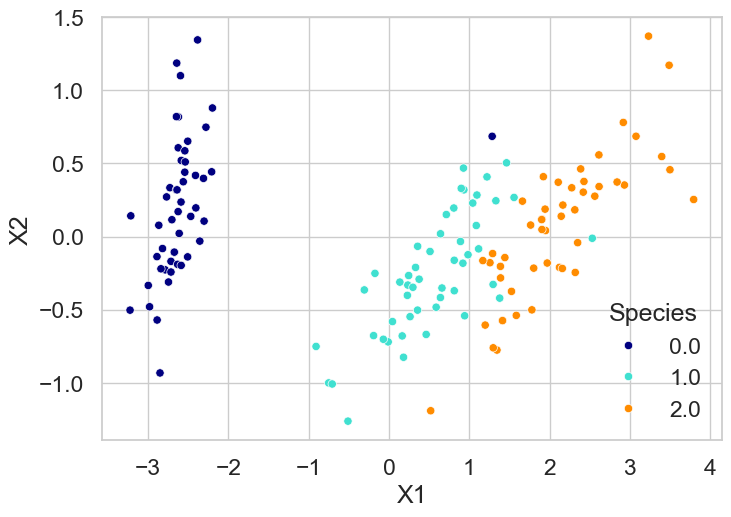

In [18]:
colors = ['navy', 'turquoise', 'darkorange']

sns.set_theme(font_scale=1.5)
# Tạo biểu đồ phân tán
sns.set_style("whitegrid")
sns.scatterplot(x=clustering_data['X1'],y=clustering_data['X2'],
                hue=target_data, palette=colors)
plt.show()

#### Xác định số lượng cụm

Sử dụng phương pháp Elbow 

Tính giá trị tổng bình phương(within-cluster sum of squares(WCSS)) trong cụm

In [19]:
wcss=[]
for i in range(1,11):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([665.59556665, 137.15100935,  63.87383806,  42.45123608,
        34.90338519,  28.20362146,  28.12043961,  18.19919343,
        15.72566909,  13.8216036 ])

Trực quan hóa phương pháp Elbow

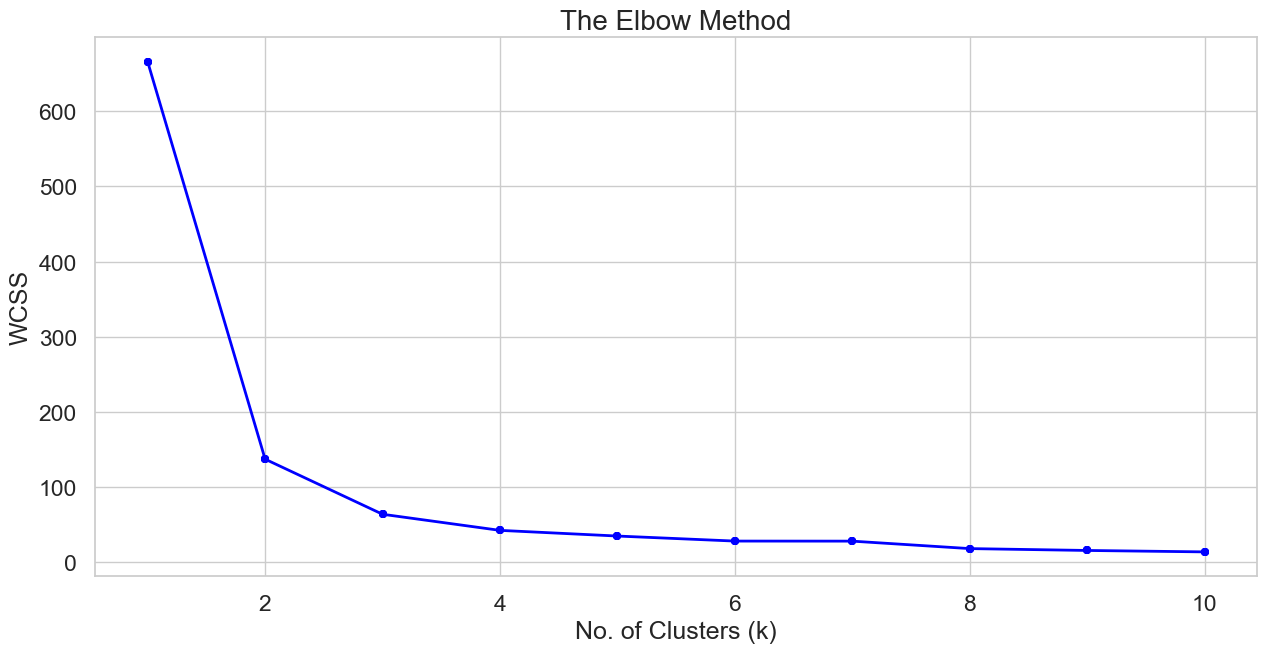

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

Dễ dàng thấy số cụm là 2 cho kết quả tốt vì đường dốc sau đó không đủ lớn.

Dùng thước đo

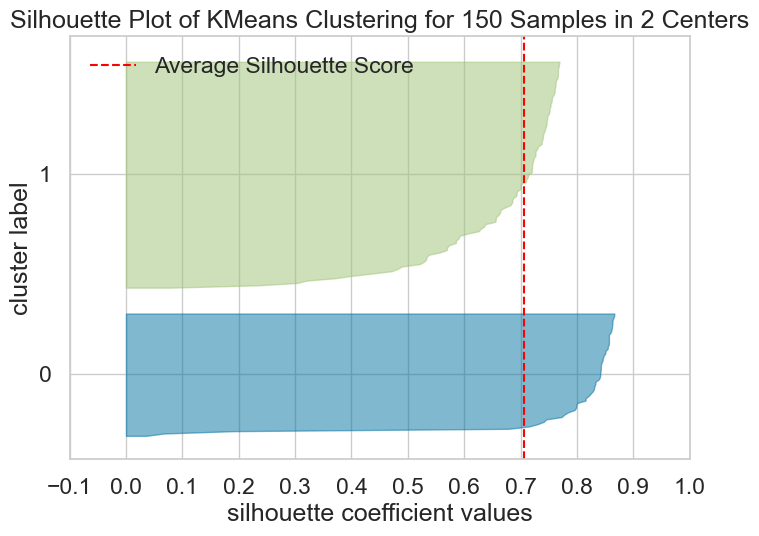

0.7055088264308357


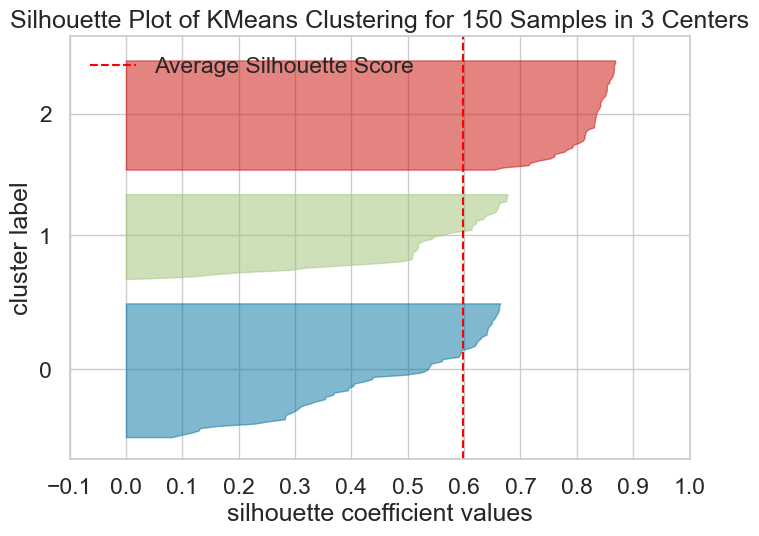

0.5975649100584399


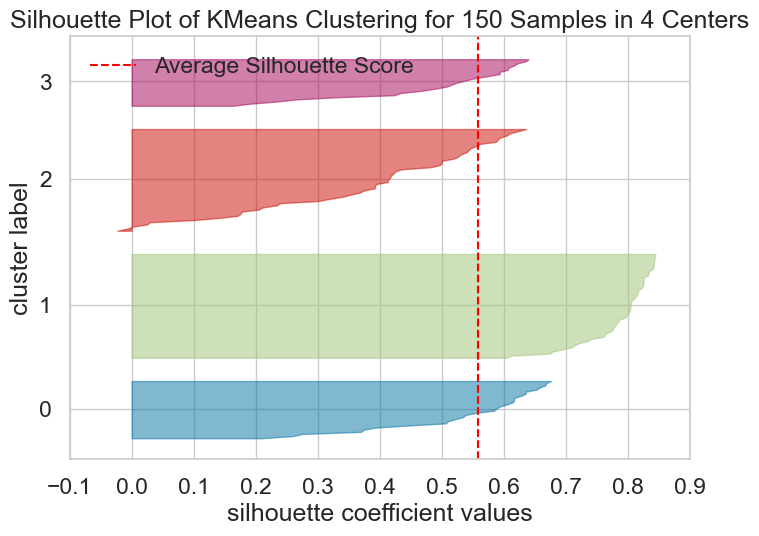

0.5589503869604444


In [21]:
for i in range(1,4):
    print(silhouette_visualizer(KMeans(i+1), clustering_data, colors='yellowbrick').silhouette_score_)

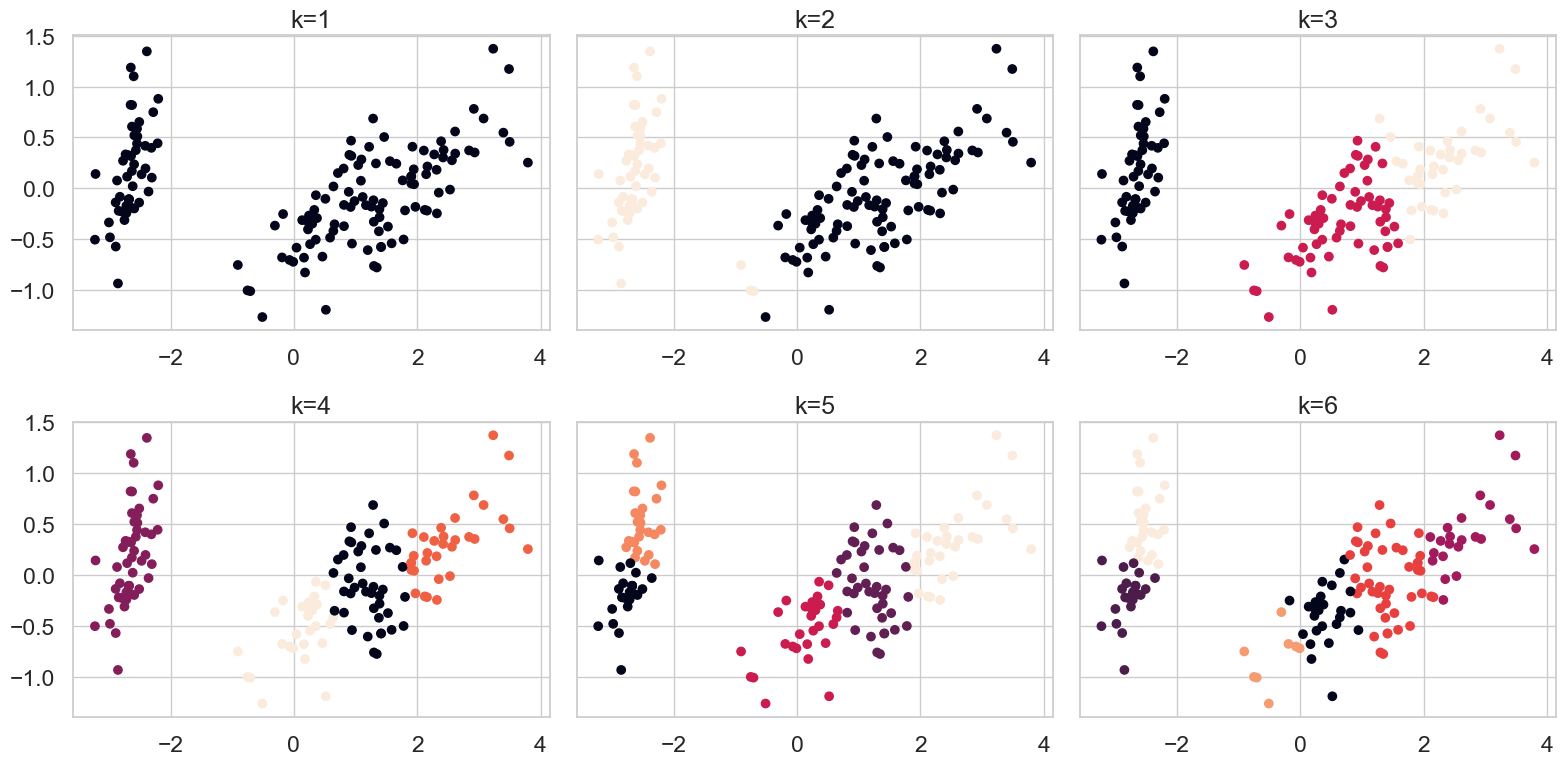

In [22]:
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(16,8))

for i in range(0,6):
    km = KMeans(i+1)
    axs[i // 3,i % 3].scatter(x=clustering_data['X1'],y=clustering_data['X2'], c=km.fit_predict(clustering_data))
    axs[i // 3,i % 3].set_title(f"k={i+1}")
    
fig.tight_layout()
plt.show()

### Phân cụm dựa vào số nhãn là 3 của dataset

In [23]:
kms = KMeans(n_clusters=3)
kms.fit(clustering_data)

KMeans(n_clusters=3)

Bây giờ chúng ta đã tạo các cụm, chúng ta sẽ nhập chúng vào một cột khác

In [24]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,X1,X2,Cluster_Prediction
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0


Chúng ta cũng có thể lấy trọng tâm của các cụm bằng thuộc tính cluster_centers_ của thuật toán KMeans.

In [25]:
kms.cluster_centers_


array([[-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221],
       [ 2.34645113,  0.27235455]])

### Vẽ biểu đồ dữ liệu

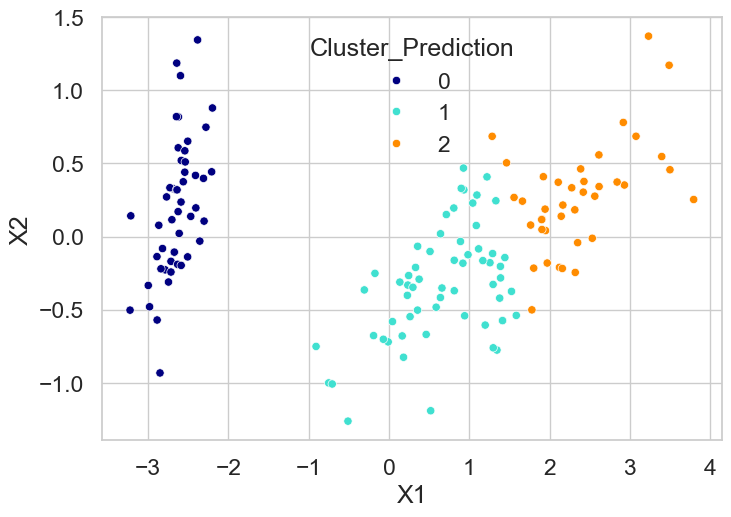

In [26]:

sns.set_theme(font_scale=1.5)
# Tạo biểu đồ phân tán
sns.set_style("whitegrid")
sns.scatterplot(x=clustering_data['X1'],y=clustering_data['X2'], 
                hue=clusters['Cluster_Prediction'], palette=colors)
plt.show()

## K-medoids

### Import các thư viện cần thiết

In [27]:
from sklearn_extra.cluster import KMedoids

ModuleNotFoundError: No module named 'sklearn_extra'

### Khởi tạo dữ liệu và mô hình

In [ ]:
clusters_2 = clustering_data.copy()
kmedoids = KMedoids(3).fit(clusters_2)

### Phân cụm dữ liệu với k-Medoids

In [ ]:

clusters_2['Cluster_Prediction'] = kmedoids.predict(clusters_2)
sns.set_theme(font_scale=1.5)
# Tạo biểu đồ phân tán
sns.set_style("whitegrid")
sns.scatterplot(x=clustering_data['X1'],y=clustering_data['X2'], 
                hue=clusters_2['Cluster_Prediction'], palette=colors)
plt.show()

# Fuzzy c-means

In [ ]:
from fcmeans import FCM

In [ ]:
fcm_data = clustering_data.copy()
fcm = FCM(n_clusters=3, m=2)
fcm.fit(fcm_data.to_numpy())

fcm_data["Cluster_Prediction"] = fcm.predict(fcm_data.to_numpy())

sns.set_theme(font_scale=1.5)
# Tạo biểu đồ phân tán
sns.set_style("whitegrid")
sns.scatterplot(x=clustering_data['X1'],y=clustering_data['X2'], 
                hue=fcm_data["Cluster_Prediction"], palette=colors)
plt.show()


In [ ]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16,4))

axs[0].scatter(clustering_data['X1'], clustering_data['X2'], c=target_data)
axs[0].set_title("Reality")

axs[1].scatter(clustering_data['X1'], clustering_data['X2'], c=clusters['Cluster_Prediction'])
axs[1].set_title("KMeans")

axs[2].scatter(clustering_data['X1'], clustering_data['X2'], c=clusters_2['Cluster_Prediction'])
axs[2].set_title("Medoids")

axs[3].scatter(clustering_data['X1'], clustering_data['X2'], c=fcm_data['Cluster_Prediction'])
axs[3].set_title("FCM")

fig.tight_layout()
plt.show()

## So sánh giữa giữa các mô hình

In [ ]:
ks = range(2, 10)
kmeans_ss = []
kmedoids_ss = []
fcm_ss = []

kmeans_mis = []
kmedoids_mis = []
fcm_mis = []

predict_data = clustering_data.copy()

for n in ks:
    kmeans_ss1 = 0
    kmedoids_ss1 = 0
    fcm_ss1 = 0
    
    kmeans_mis1 = 0
    kmedoids_mis1 = 0
    fcm_mis1 = 0
    
    for _ in range (10):
        kmeans_model = KMeans(n).fit(clustering_data.copy())
        kmedoids_model = KMedoids(n).fit(clustering_data.copy())
        fcm_model = FCM(n_clusters=n, m=3)
        fcm_model.fit(clustering_data.copy().to_numpy())
        
        predict_data["kmeans"] = kmeans_model.predict(clustering_data)
        predict_data["kmedoids"] = kmedoids_model.predict(clustering_data)
        predict_data["fcm"] = fcm_model.predict(clustering_data.copy().to_numpy())
        
        kmeans_ss1 += silhouette_score(clustering_data, predict_data["kmeans"])
        kmedoids_ss1 += silhouette_score(clustering_data, predict_data["kmedoids"])
        fcm_ss1 += silhouette_score(clustering_data, predict_data["fcm"]) #fcm_model.partition_coefficient 
        
        kmeans_mis1 += normalized_mutual_info_score(target_data, predict_data["kmeans"])
        kmedoids_mis1 += normalized_mutual_info_score(target_data, predict_data["kmedoids"])
        fcm_mis1 += normalized_mutual_info_score(target_data, predict_data["fcm"])
        
    kmeans_ss.append(kmeans_ss1/10)
    kmedoids_ss.append(kmedoids_ss1/10)
    fcm_ss.append(fcm_ss1/10)
    
    kmeans_mis.append(kmeans_mis1/10)
    kmedoids_mis.append(kmedoids_mis1/10)
    fcm_mis.append(fcm_mis1/10)
    


In [ ]:
plt.plot(ks, kmeans_ss, label = "K-means") 
plt.plot(ks, kmedoids_ss, label = "K-medoids") 
plt.plot(ks, fcm_ss, label = "fcm")
plt.title("Thước đo Silhouette Score")
plt.legend() 
plt.show()

In [ ]:
plt.plot(ks, kmeans_mis, label = "K-means") 
plt.plot(ks, kmedoids_mis, label = "K-medoids") 
plt.plot(ks, fcm_mis, label = "fcm") 
plt.title("Thước đo Normalized Mutual Info Score")
plt.legend() 
plt.show()